In [1]:
from scipy.stats import bernoulli, nbinom, binom
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import Counter

def try_till_success(n):
    '''
    1. 1회씩 시도(Bernoulli)하여 성공 횟수가 10회 누적될 때까지 try count를 누적시킨다
    2. 10번 성공하면 try_counts에 append 한 뒤 초기화
    3. 1~2를 n회 반복
    *numpy에는 Bernoulli가 없으니 이항 분포에서 n=1로 하여 대신 사용한다.
    '''
    try_counts = []
    for _ in tqdm(range(n)):
        success = 0
        try_count = 0
        while success < 10: 
            try_count += 1
            success += bernoulli.rvs(p)

        try_counts.append(try_count)
    return try_counts

def bar_plotter(nums):
    '''
    matplotlib이 제공하는 히스토그램은 여러 개를 겹쳐그릴 때 이쁘지 않아 bar plot으로 대신 그렸다
    '''
    num_counter = Counter(nums)
    plt.bar(
            num_counter.keys(),
            num_counter.values(),
            width=0.9, alpha=0.3
           )
    plt.show()

In [2]:
n = 100000
p = 0.7
try_list = try_till_success(n)
nb_list = [10 + nbinom.rvs(10, p) for _ in range(n)]
binom_list = [binom.rvs(int(10/0.7**2), p) for _ in range(n)]

100%|██████████| 100000/100000 [00:37<00:00, 2658.38it/s]


In [3]:
try_counter = Counter(try_list)
nb_counter = Counter(nb_list)
binom_counter = Counter(binom_list)

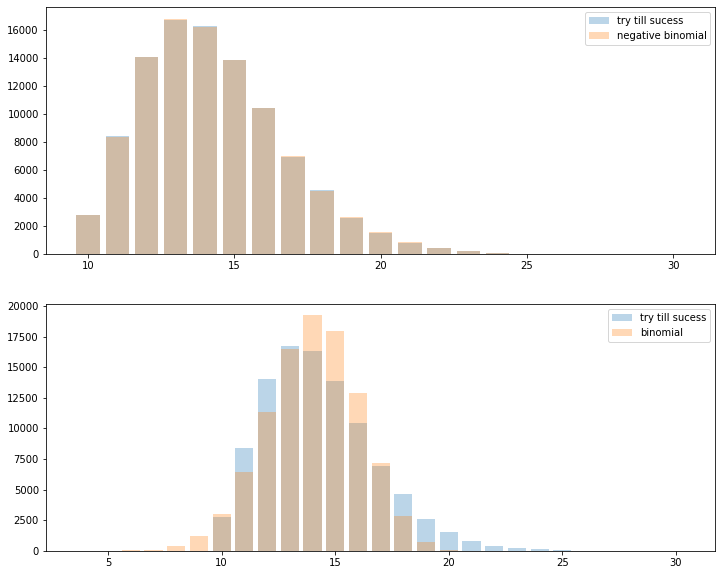

In [4]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(nb_counter.keys(), nb_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'negative binomial'])

plt.subplot(2,1,2)
plt.bar(try_counter.keys(), try_counter.values(), alpha=0.3)
plt.bar(binom_counter.keys(), binom_counter.values(), alpha=.3)
plt.legend(['try till sucess', 'binomial'])
plt.savefig(f"./images/1.9.png")